![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

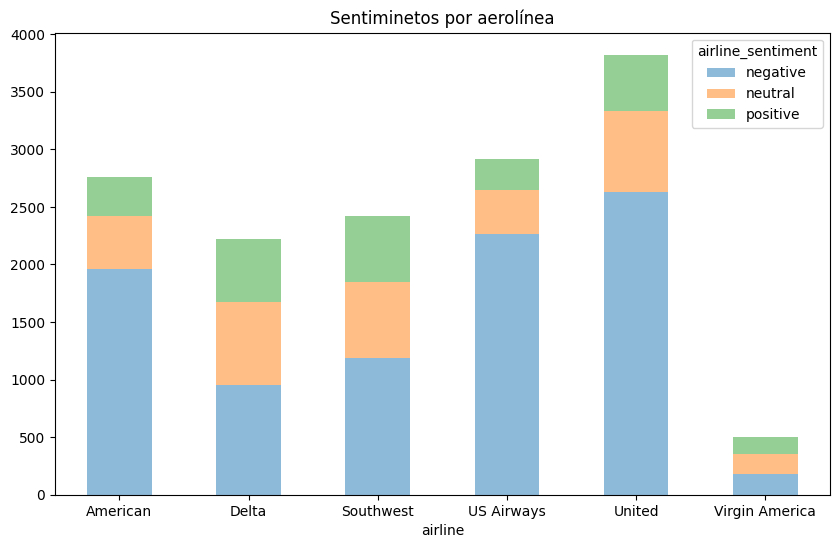

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 1
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_vectorized, y_train)

y_pred = random_forest.predict(X_test_vectorized)

accuracy_CV = accuracy_score(y_test, y_pred)
print("Precisión del modelo (Accuracy): {:.2f}%".format(accuracy_CV * 100))


Precisión del modelo (Accuracy): 77.11%


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 2
# Eliminación de stopwords al usar el parámetro 'stop_words' de la función CountVectorizer()
vect_no_stopw = CountVectorizer(stop_words='english')

# Ajustar y transformar los datos de entrenamiento
X_train_no_stopw = vect_no_stopw.fit_transform(X_train)

# Transformar los datos de prueba
X_test_no_stopw = vect_no_stopw.transform(X_test)

# Crear una instancia del clasificador RandomForestClassifier
modelo_no_stopw = RandomForestClassifier(random_state=42)

# Entrenar el modelo utilizando los datos de entrenamiento
modelo_no_stopw.fit(X_train_no_stopw, y_train)

# Predecir las etiquetas de sentimiento en el conjunto de prueba
y_no_stopw = modelo_no_stopw.predict(X_test_no_stopw)

# Evaluar el desempeño del modelo utilizando la métrica de precisión (accuracy)
accuracy_no_stopw = accuracy_score(y_test, y_no_stopw)
print("Accuracy del modelo usando CountVectorizer con eliminación de stopwords: {:.2f}%".format(accuracy_no_stopw * 100))

# Impresión de stopwords del texto
print("Stopwords utilizadas en CountVectorizer con eliminación de stopwords:")
print(vect_no_stopw.get_stop_words())

Accuracy del modelo usando CountVectorizer con eliminación de stopwords: 76.18%
Stopwords utilizadas en CountVectorizer con eliminación de stopwords:
frozenset({'himself', 'out', 'sometimes', 'done', 'each', 'wherein', 'as', 'if', 'my', 'was', 'namely', 'well', 'others', 'formerly', 'side', 'do', 'thru', 'alone', 'sincere', 'or', 'may', 'ten', 'herself', 'might', 'call', 'however', 'his', 'found', 'front', 'be', 'upon', 'i', 'themselves', 'same', 'than', 'another', 'inc', 'twenty', 'with', 'against', 'became', 'of', 'these', 'mine', 'already', 'has', 'him', 'whenever', 'also', 'nobody', 'us', 'even', 'indeed', 'will', 'otherwise', 'must', 'yourselves', 'after', 'can', 'keep', 'anyhow', 'more', 'for', 'further', 'rather', 'mill', 'whose', 'fill', 'all', 'are', 'whether', 'what', 'would', 'beside', 'everyone', 'somehow', 'around', 'to', 'whole', 'nor', 'hereupon', 'thin', 'where', 'twelve', 'have', 'which', 'hence', 'them', 'thick', 'why', 'seeming', 'ie', 'either', 'by', 'describe', 'un

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
# Celda 3
# Importación de librerias
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')

# Crear una instancia de CountVectorizer con lematización de verbos
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t, pos='v') for t in nltk.word_tokenize(doc)]

#vect_lemas = CountVectorizer(analyzer=split_into_lemmas)
vect_lemas = CountVectorizer(tokenizer=LemmaTokenizer())

# Ajustar y transformar los datos de entrenamiento
X_train_lemas = vect_lemas.fit_transform(X_train)

# Transformar los datos de prueba
X_test_lemas = vect_lemas.transform(X_test)

# Crear una instancia del clasificador RandomForestClassifier
modelo_lemas = RandomForestClassifier(random_state=42)

# Entrenar el modelo utilizando los datos de entrenamiento
modelo_lemas.fit(X_train_lemas, y_train)

# Predecir las etiquetas de sentimiento en el conjunto de prueba
y_lemas = modelo_lemas.predict(X_test_lemas)

# Evaluar el desempeño del modelo utilizando la métrica de precisión (accuracy)
accuracy_lemas = accuracy_score(y_test, y_lemas)
print("Accuracy del modelo usando CountVectorizer con lematización con verbos: {:.2f}%".format(accuracy_lemas * 100))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy del modelo usando CountVectorizer con lematización con verbos: 77.50%


### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
# Celda 4
# Crear una instancia de CountVectorizer con eliminación de stopwords y lematización de verbos
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t, pos='v') for t in nltk.word_tokenize(doc)]

vect_all  = CountVectorizer(tokenizer=LemmaTokenizer(), stop_words='english')

# Ajustar y transformar los datos de entrenamiento
X_train_all = vect_all.fit_transform(X_train)

# Transformar los datos de prueba
X_test_all = vect_all.transform(X_test)

# Crear una instancia del clasificador RandomForestClassifier
modelo_all = RandomForestClassifier(random_state=42)

# Entrenar el modelo utilizando los datos de entrenamiento
modelo_all.fit(X_train_all, y_train)

# Predecir las etiquetas de sentimiento en el conjunto de prueba
y_all = modelo_all.predict(X_test_all)

# Evaluar el desempeño del modelo utilizando la métrica de precisión (accuracy)
accuracy_all = accuracy_score(y_test, y_all)
print("Accuracy del modelo usando CountVectorizer con eliminación de stopwords y con lematización con verbos: {:.2f}%".format(accuracy_all * 100))

Accuracy del modelo usando CountVectorizer con eliminación de stopwords y con lematización con verbos: 77.73%


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

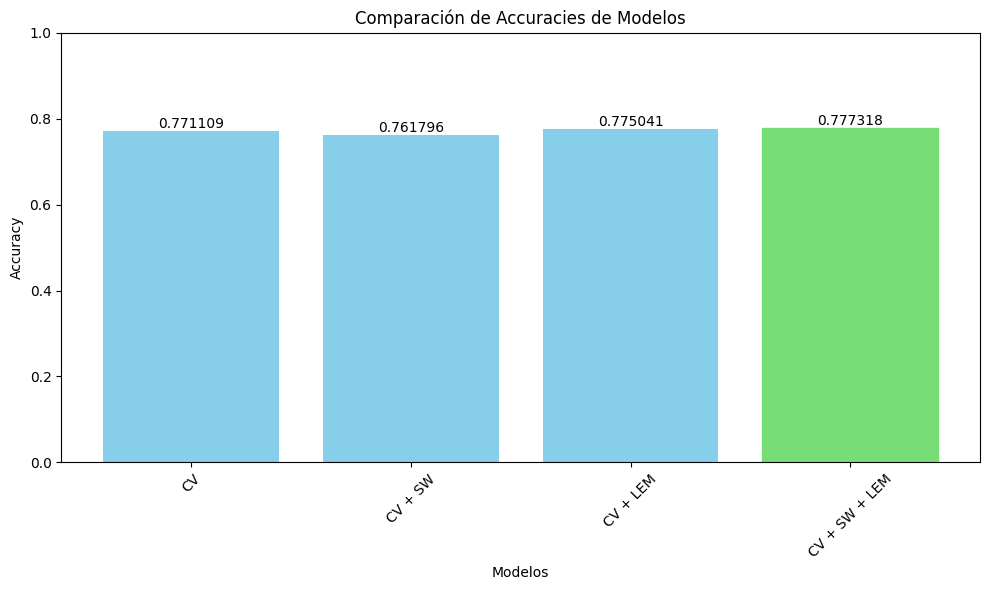

In [16]:
# Celada 5
import matplotlib.pyplot as plt

# Definir los nombres de los modelos y sus accuracies
model_names = ['CV', 'CV + SW', 'CV + LEM', 'CV + SW + LEM']
accuracies = [accuracy_CV, accuracy_no_stopw, accuracy_lemas, accuracy_all]  # Reemplaza con tus valores

# Obtener el índice del modelo con el mejor accuracy
best_model_index = accuracies.index(max(accuracies))

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')
bars[best_model_index].set_color('#77dd77')  # Cambiar el color de la barra del mejor accuracy
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracies de Modelos')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)

# Función para agregar etiquetas a las barras
def addlabels(x, y, bars):
    for i in range(len(x)):
        plt.text(i, y[i], f"{y[i]:.6f}", ha='center', va='bottom')

addlabels(model_names, accuracies, bars)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



Se observa que el modelo con CountVectorizer, eliminación de stopwords y lematización de verbos obtuvo la precisión más alta, con un 77.73%. 

Ventajas del mejor modelo:

- La eliminación de stopwords reduce el ruido en el texto al eliminar palabras comunes que no aportan información discriminativa.
- La lematización de verbos reduce la variabilidad del texto al agrupar las palabras según su forma base.
- La precisión del 77.73% indica que el modelo tiene una buena capacidad para generalizar y predecir los sentimientos de los tweets en datos nuevos.

Desventajas del modelo con el menor desempeño (CountVectorizer con eliminación de stopwords):

- Es posible que la eliminación de algunas palabras que no son stopwords pero que tienen un significado importante para la clasificación de sentimientos pueda afectar negativamente el desempeño del modelo.